In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression


In [12]:
# reading a csv file
salary = pd.read_csv("E:\\Data Science\\Assignments\\15. Simple Linear Regression\\Salary_Data.csv")
print(salary.head())
print(".....................................................")
print("number of columns",salary.shape[1])
print("number of rows/records",salary.shape[0])

   YearsExperience  SalaryHike
0              1.1       39343
1              1.3       46205
2              1.5       37731
3              2.0       43525
4              2.2       39891
.....................................................
number of columns 2
number of rows/records 30


In [13]:
salary.info()
print("...........................................")
print(salary.isnull().sum())                 #checking for null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
YearsExperience    30 non-null float64
SalaryHike         30 non-null int64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes
...........................................
YearsExperience    0
SalaryHike         0
dtype: int64


In [14]:
salary.describe()    

,YearsExperience,SalaryHike
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
INSIGHT:
      -there is not a big gap between minmum value and maximum value for both the columns,so there is no outliers in dataset.

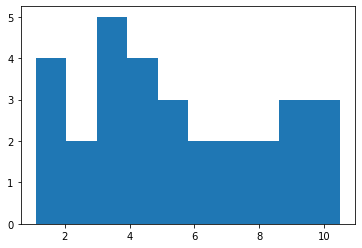

In [16]:
#analysing the data using visualization
plt.hist(salary.YearsExperience)
plt.show()

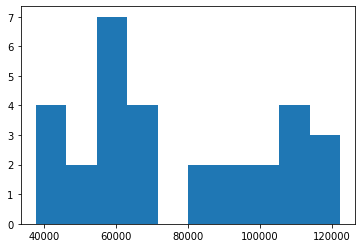

In [19]:
plt.hist(salary.SalaryHike)
plt.show()

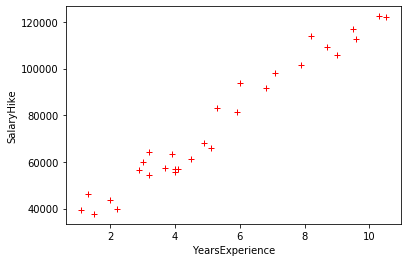

In [24]:
plt.plot(salary["YearsExperience"],salary["SalaryHike"], "r+")
plt.xlabel("YearsExperience")
plt.ylabel("SalaryHike")
plt.show()

In [25]:
#correlation value between feature and outcome
print(np.corrcoef(salary.YearsExperience,salary.SalaryHike))


[[1.         0.97824162]
 [0.97824162 1.        ]]


In [26]:
#start  training model
model=smf.ols('SalaryHike~YearsExperience', data=salary).fit()
print(model.params)        #getting models parameter
print(model.summary())    #summary of models(p value,r square value etc.)
          #r square 0.957

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             SalaryHike   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           1.14e-20
Time:                        16:45:40   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [27]:
print(model.conf_int(0.05))   #95% confidence level

                            0             1
Intercept        21136.061314  30448.339084
YearsExperience   8674.118747  10225.805896


In [28]:
pred=model.predict(salary.iloc[:,:])      #predict the value of salary using trained model
print(pred.head(10))

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
5    53197.090931
6    54142.087163
7    56032.079627
8    56032.079627
9    60757.060788
dtype: float64


In [29]:
#rmse for given model
rmse=np.sqrt(np.mean((pred-salary.SalaryHike)**2))
print(rmse)                                         #5592 RMSE


5592.043608760661


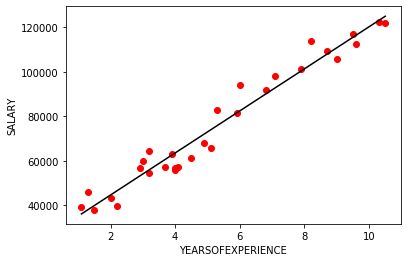

In [30]:
#visualization of regression line using matplotlib
plt.scatter(x=salary['YearsExperience'],y=salary['SalaryHike'],color='red')
plt.plot(salary['YearsExperience'],pred,color='black')
plt.xlabel('YEARSOFEXPERIENCE')
plt.ylabel('SALARY')
plt.show()


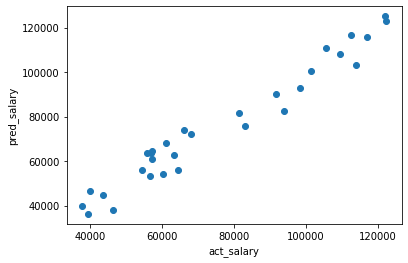

In [36]:
plt.scatter(x=salary.SalaryHike, y=pred)
plt.xlabel('act_salary')
plt.ylabel('pred_salary')
plt.show()                                                                    #actual salary vs predicted salary

In [37]:
#looking for alternate model like quadratic or exponential
   #quadratic model
salary["YearsExperience_square"]=salary.YearsExperience*salary.YearsExperience
print(salary.head())

   YearsExperience  SalaryHike  YearsExperience_square
0              1.1       39343                    1.21
1              1.3       46205                    1.69
2              1.5       37731                    2.25
3              2.0       43525                    4.00
4              2.2       39891                    4.84


In [38]:
model_quad=smf.ols("SalaryHike~YearsExperience+YearsExperience_square",data=salary).fit()
print(model_quad.params)
print(model_quad.summary())       # r square 0.957

Intercept                 26214.932677
YearsExperience            9259.283888
YearsExperience_square       16.392566
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             SalaryHike   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Sun, 26 Apr 2020   Prob (F-statistic):           3.59e-19
Time:                        17:05:35   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025

In [39]:
print(model_quad.conf_int(0.05))

                                   0             1
Intercept               16869.512653  35560.352701
YearsExperience          5543.405004  12975.162772
YearsExperience_square   -295.734369    328.519502


In [44]:
pred_quad=model_quad.predict(salary.iloc[:,:3])
print(pred_quad.head())

0    36419.979959
1    38279.705169
2    40140.741784
3    44799.070719
4    46664.697252
dtype: float64


In [46]:
#rmse for quadratic model
rmse_quad=np.sqrt(np.mean((pred_quad-salary.SalaryHike)**2))
print(rmse_quad)                                     #5591 rs

5590.841479683288


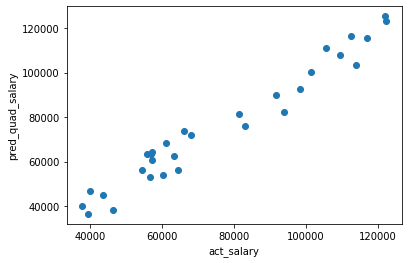

In [47]:
plt.scatter(x=salary.SalaryHike, y=pred_quad)
plt.xlabel("act_salary")
plt.ylabel("pred_quad_salary")
plt.show()

In [ ]:
     #conclusion:
       -both model linear&quadratic are same in accuracy
       -linear model(r square=0.957,rmse=5592 rs)
       -quadratic model(r square=0.957, rmse=5590)